# Eleonora A. Bacchi Assignment

## Week 1

The marketing department of Turtle Games prefers Python for data analysis. As you are fluent in Python, they asked you to assist with data analysis of social media data. The marketing department wants to better understand how users accumulate loyalty points. 

## 1. Load and explore the data

In [1]:
# Imports
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.stats.api as sms
from statsmodels.formula.api import ols
import sklearn

from sklearn import datasets 
from sklearn import linear_model
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the CSV file(s) as reviews.
rev = pd.read_csv('turtle_reviews.csv')

# View the DataFrame.
rev.head()

gender  age  remuneration (k£)  spending_score (1-100)  loyalty_points  \
0    Male   18              12.30                      39             210   
1    Male   23              12.30                      81             524   
2  Female   22              13.12                       6              40   
3  Female   25              13.12                      77             562   
4  Female   33              13.94                      40             366   

  education language platform  product  \
0  graduate       EN      Web      453   
1  graduate       EN      Web      466   
2  graduate       EN      Web      254   
3  graduate       EN      Web      263   
4  graduate       EN      Web      291   

                                              review  \
0  When it comes to a DM's screen, the space on t...   
1  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2  Nice art, nice printing.  Why two panels are f...   
3  Amazing buy! Bought it as a gift for our new d...   
4  As my review of GF9's previous screens these w...   

                                             summary  
0  The fact that 50% of this space is wasted on a...  
1  Another worthless Dungeon Master's screen from...  
2                    pretty, but also pretty useless  
3                                         Five Stars  
4                                         Money trap

In [3]:
rev.tail()

gender  age  remuneration (k£)  spending_score (1-100)  loyalty_points  \
1995  Female   37              84.46                      69            4031   
1996  Female   43              92.66                       8             539   
1997    Male   34              92.66                      91            5614   
1998    Male   34              98.40                      16            1048   
1999    Male   32              92.66                       8             479   

     education language platform  product  \
1995       PhD       EN      Web      977   
1996       PhD       EN      Web      979   
1997  graduate       EN      Web     1012   
1998       PhD       EN      Web     1031   
1999       PhD       EN      Web      453   

                                                 review  \
1995  The perfect word game for mixed ages (with Mom...   
1996  Great game.  Did not think I would like it whe...   
1997  Great game for all.........\nKeeps the mind ni...   
1998                                          fun game!   
1999  This game is fun. A lot like scrabble without ...   

                                             summary  
1995  The perfect word game for mixed ages (with Mom  
1996                                       Super fun  
1997                                      Great Game  
1998                                      Four Stars  
1999                                  Love this game

In [4]:
# Explore the data.
rev.info()
print(rev.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gender                  2000 non-null   object 
 1   age                     2000 non-null   int64  
 2   remuneration (k£)       2000 non-null   float64
 3   spending_score (1-100)  2000 non-null   int64  
 4   loyalty_points          2000 non-null   int64  
 5   education               2000 non-null   object 
 6   language                2000 non-null   object 
 7   platform                2000 non-null   object 
 8   product                 2000 non-null   int64  
 9   review                  2000 non-null   object 
 10  summary                 2000 non-null   object 
dtypes: float64(1), int64(4), object(6)
memory usage: 172.0+ KB
(2000, 11)


In [5]:
# Check for missing values
rev.isnull().sum()

gender                    0
age                       0
remuneration (k£)         0
spending_score (1-100)    0
loyalty_points            0
education                 0
language                  0
platform                  0
product                   0
review                    0
summary                   0
dtype: int64

In [6]:
# Descriptive statistics.
rev.describe()

age  remuneration (k£)  spending_score (1-100)  loyalty_points  \
count  2000.000000        2000.000000             2000.000000     2000.000000   
mean     39.495000          48.079060               50.000000     1578.032000   
std      13.573212          23.123984               26.094702     1283.239705   
min      17.000000          12.300000                1.000000       25.000000   
25%      29.000000          30.340000               32.000000      772.000000   
50%      38.000000          47.150000               50.000000     1276.000000   
75%      49.000000          63.960000               73.000000     1751.250000   
max      72.000000         112.340000               99.000000     6847.000000   

            product  
count   2000.000000  
mean    4320.521500  
std     3148.938839  
min      107.000000  
25%     1589.250000  
50%     3624.000000  
75%     6654.000000  
max    11086.000000

## 2. Drop columns

In [7]:
# Use ‘dropped.drop’ to remove irrelevant columns from the DataFrame. 
# Specify that ‘language’ and ‘platform’ are columns (i.e. ‘axis 1’). 
rev1 = rev.drop(['language', 'platform'], axis=1)  

# Check the DataFrame.
rev1.columns

Index(['gender', 'age', 'remuneration (k£)', 'spending_score (1-100)',
       'loyalty_points', 'education', 'product', 'review', 'summary'],
      dtype='object')

## 3. Rename columns

In [8]:
# Rename the column headers.
rev2 = rev1.rename(columns={"remuneration (k£)": "income_K£", "spending_score (1-100)": "spending_score"})

In [9]:
# View column names.
rev2.info()
rev2.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          2000 non-null   object 
 1   age             2000 non-null   int64  
 2   income_K£       2000 non-null   float64
 3   spending_score  2000 non-null   int64  
 4   loyalty_points  2000 non-null   int64  
 5   education       2000 non-null   object 
 6   product         2000 non-null   int64  
 7   review          2000 non-null   object 
 8   summary         2000 non-null   object 
dtypes: float64(1), int64(4), object(4)
memory usage: 140.8+ KB


Index(['gender', 'age', 'income_K£', 'spending_score', 'loyalty_points',
       'education', 'product', 'review', 'summary'],
      dtype='object')

## 4. Save the DataFrame as a CSV file

In [10]:
# Create a CSV file as output.
rev2.to_csv('cleaned_reviews.csv', index=False)

In [11]:
# Import new CSV file with Pandas.
# Load the CSV file(s) as reviews.
c_rev = pd.read_csv('cleaned_reviews.csv')

# View DataFrame.
c_rev.head()

gender  age  income_K£  spending_score  loyalty_points education  product  \
0    Male   18      12.30              39             210  graduate      453   
1    Male   23      12.30              81             524  graduate      466   
2  Female   22      13.12               6              40  graduate      254   
3  Female   25      13.12              77             562  graduate      263   
4  Female   33      13.94              40             366  graduate      291   

                                              review  \
0  When it comes to a DM's screen, the space on t...   
1  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2  Nice art, nice printing.  Why two panels are f...   
3  Amazing buy! Bought it as a gift for our new d...   
4  As my review of GF9's previous screens these w...   

                                             summary  
0  The fact that 50% of this space is wasted on a...  
1  Another worthless Dungeon Master's screen from...  
2                    pretty, but also pretty useless  
3                                         Five Stars  
4                                         Money trap

## 5. Linear Regression

### 5a) spending vs. loyalty

In [12]:
# Independent variable.
X = c_rev['loyalty_points'].values.reshape(-1, 1) 

# Dependent variable.
y = c_rev['spending_score'].values.reshape(-1, 1)

# OLS model.
f = 'y ~ X'
test = ols(f, data = c_rev).fit()

# Print the regression table.
test.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.452
Model:                            OLS   Adj. R-squared:                  0.452
Method:                 Least Squares   F-statistic:                     1648.
Date:                Fri, 09 Sep 2022   Prob (F-statistic):          2.92e-263
Time:                        16:22:07   Log-Likelihood:                -8759.4
No. Observations:                2000   AIC:                         1.752e+04
Df Residuals:                    1998   BIC:                         1.753e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     28.4260      0.685     41.504      0.000      27.083      29.769
X              0.0137      0.000     40.595      0.000       0.013       0.014
==============================================================================
Omnibus:                      169.397   Durbin-Watson:                   2.599
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              212.607
Skew:                           0.768   Prob(JB):                     6.81e-47
Kurtosis:                       3.441   Cond. No.                     3.22e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.22e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

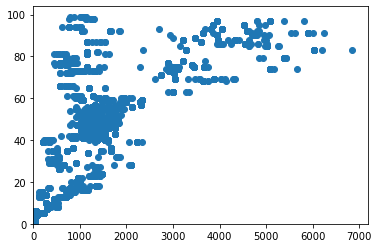

In [13]:
# Check for linearity.
plt.scatter(X, y)

plt.xlim(0)
plt.ylim(0)
plt.show()

In [14]:
# Extract the estimated parameters.
print("Parameters: ", test.params)

# Extract the standard errors.
print("Standard errors: ", test.bse)

# Extract the predicted values.
print("Predicted values: ", test.predict())

Parameters:  Intercept    28.426033
X             0.013671
dtype: float64
Standard errors:  Intercept    0.684905
X            0.000337
dtype: float64
Predicted values:  [ 31.29703545  35.58986696  28.97289101 ... 105.17748592  42.75370042
  34.97465225]


In [15]:
# Set the X coefficient and the constant to generate the regression table.
y_pred = 0.0136 * c_rev['loyalty_points'] + 28.426033

# View the output.
y_pred

0        31.282033
1        35.552433
2        28.970033
3        36.069233
4        33.403633
           ...    
1995     83.247633
1996     35.756433
1997    104.776433
1998     42.678833
1999     34.940433
Name: loyalty_points, Length: 2000, dtype: float64

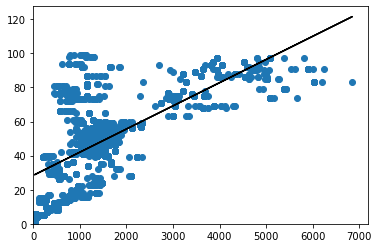

In [16]:
# Plot the graph with a regression line.
plt.scatter(X, y)

# Plot the regression line (in black).
plt.plot(X, y_pred, color='black') 

# Set the x and y limits on the axes:
plt.xlim(0)
plt.ylim(0)
plt.show()

### 5b) income vs. loyalty

In [17]:
# Independent variable.
X = c_rev['loyalty_points'].values.reshape(-1, 1) 

# Dependent variable.
y = c_rev['income_K£'].values.reshape(-1, 1)

# OLS model.
f = 'y ~ X'
test = ols(f, data = c_rev).fit()

# Print the regression table.
test.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.380
Model:                            OLS   Adj. R-squared:                  0.379
Method:                 Least Squares   F-statistic:                     1222.
Date:                Fri, 09 Sep 2022   Prob (F-statistic):          2.43e-209
Time:                        16:22:08   Log-Likelihood:                -8641.8
No. Observations:                2000   AIC:                         1.729e+04
Df Residuals:                    1998   BIC:                         1.730e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     30.5606      0.646     47.321      0.000      29.294      31.827
X              0.0111      0.000     34.960      0.000       0.010       0.012
==============================================================================
Omnibus:                      382.801   Durbin-Watson:                   1.461
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              657.257
Skew:                           1.230   Prob(JB):                    1.90e-143
Kurtosis:                       4.357   Cond. No.                     3.22e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.22e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

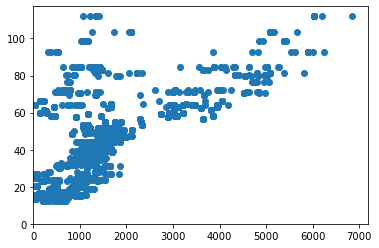

In [18]:
# Check for linearity.
plt.scatter(X, y)

plt.xlim(0)
plt.ylim(0)
plt.show()

In [19]:
# Extract the estimated parameters.
print("Parameters: ", test.params)

# Extract the standard errors.
print("Standard errors: ", test.bse)

# Extract the predicted values.
print("Predicted values: ", test.predict())

Parameters:  Intercept    30.560555
X             0.011101
dtype: float64
Standard errors:  Intercept    0.645817
X            0.000318
dtype: float64
Predicted values:  [32.89186761 36.3777352  31.00461446 ... 92.88431491 42.19491551
 35.87816819]


In [20]:
# Set the X coefficient and the constant to generate the regression table.
y_pred = 0.011101 * c_rev['loyalty_points'] + 30.5605

# View the output.
y_pred

0       32.891710
1       36.377424
2       31.004540
3       36.799262
4       34.623466
          ...    
1995    75.308631
1996    36.543939
1997    92.881514
1998    42.194348
1999    35.877879
Name: loyalty_points, Length: 2000, dtype: float64

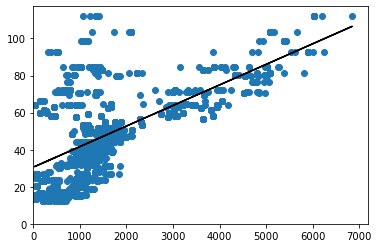

In [21]:
# Plot the graph with a regression line.
plt.scatter(X, y)

# Plot the regression line (in black).
plt.plot(X, y_pred, color='black') 

# Set the x and y limits on the axes:
plt.xlim(0)
plt.ylim(0)
plt.show()

### 5c) age vs. loyalty

In [22]:
# Independent variable.
X = c_rev['loyalty_points'].values.reshape(-1, 1) 

# Dependent variable.
y = c_rev['age'].values.reshape(-1, 1)

# OLS model.
f = 'y ~ X'
test = ols(f, data = c_rev).fit()

# Print the regression table.
test.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     3.606
Date:                Fri, 09 Sep 2022   Prob (F-statistic):             0.0577
Time:                        16:22:08   Log-Likelihood:                -8051.8
No. Observations:                2000   AIC:                         1.611e+04
Df Residuals:                    1998   BIC:                         1.612e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     40.2035      0.481     83.615      0.000      39.261      41.146
X             -0.0004      0.000     -1.899      0.058      -0.001    1.47e-05
==============================================================================
Omnibus:                       99.357   Durbin-Watson:                   2.129
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              112.564
Skew:                           0.574   Prob(JB):                     3.61e-25
Kurtosis:                       2.814   Cond. No.                     3.22e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.22e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

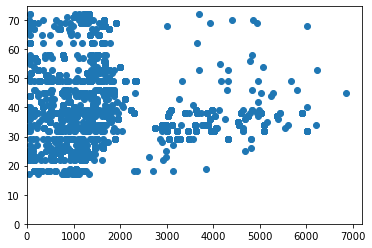

In [23]:
# Check for linearity.
plt.scatter(X, y)

plt.xlim(0)
plt.ylim(0)
plt.show()

In [24]:
# Extract the estimated parameters.
print("Parameters: ", test.params)

# Extract the standard errors.
print("Standard errors: ", test.bse)

# Extract the predicted values.
print("Predicted values: ", test.predict())

Parameters:  Intercept    40.203457
X            -0.000449
dtype: float64
Standard errors:  Intercept    0.480816
X            0.000236
dtype: float64
Predicted values:  [40.10917768 39.96820745 40.18549915 ... 37.683053   39.73295776
 39.98841019]


In [25]:
# Set the X coefficient and the constant to generate the regression table.
y_pred = -0.0004 * c_rev['loyalty_points'] + 40.203457

# View the output.
y_pred

0       40.119457
1       39.993857
2       40.187457
3       39.978657
4       40.057057
          ...    
1995    38.591057
1996    39.987857
1997    37.957857
1998    39.784257
1999    40.011857
Name: loyalty_points, Length: 2000, dtype: float64

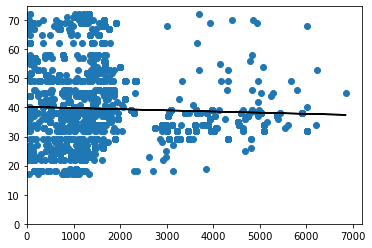

In [26]:
# Plot the graph with a regression line.
plt.scatter(X, y)

# Plot the regression line (in black).
plt.plot(X, y_pred, color='black') 

# Set the x and y limits on the axes:
plt.xlim(0)
plt.ylim(0)
plt.show()

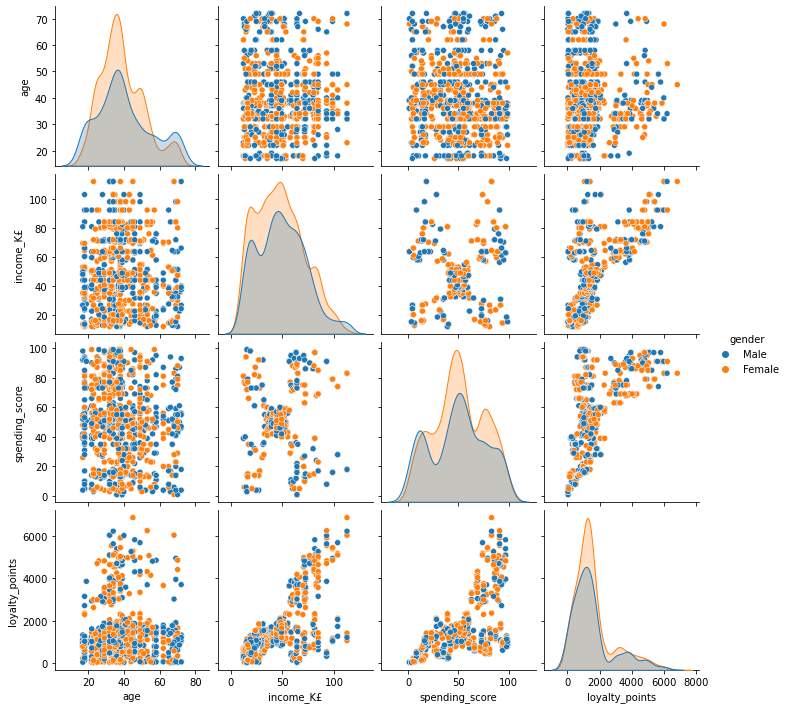

In [27]:
# Can use to review behaviour between classes, eg gender/education
var = c_rev[['age', 'income_K£', 'spending_score', 'loyalty_points']]

sns.pairplot(c_rev, vars=var, hue='gender', diag_kind= 'kde')

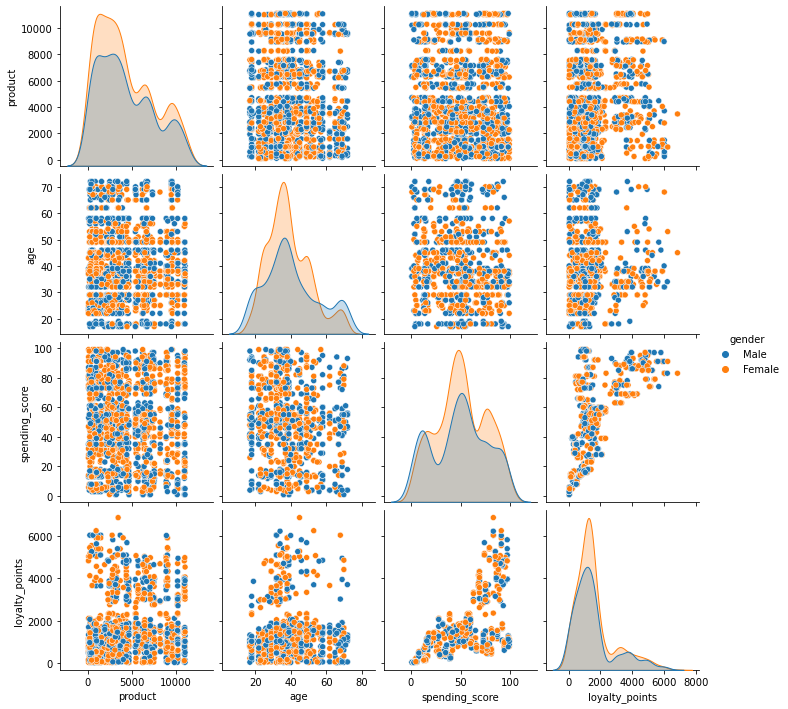

In [28]:
# Can use to review behaviour between classes.
var = c_rev[['product', 'age', 'spending_score', 'loyalty_points']]

sns.pairplot(c_rev, vars=var, hue='gender', diag_kind= 'kde')

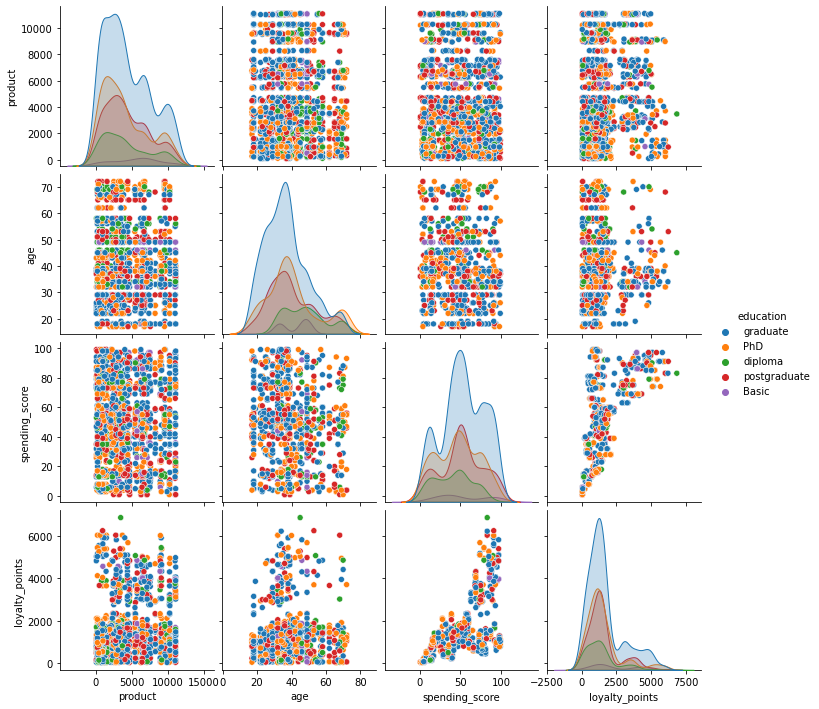

In [29]:
# Can use to review behaviour between classes.
var = c_rev[['product', 'age', 'spending_score', 'loyalty_points']]

sns.pairplot(c_rev, vars=var, hue='education', diag_kind= 'kde')

## Observations and insights

There is absolutely no relation between the age of the customers and their loyalty, this can be clearly seen in the graph and in the R-squared value.
Of the 3 models the best is the one about spending and loyalty but I am not satisfied by the R-squared value: what could be happening is that we obtain this result for the spending vs. loyalty because Turtle might be employing some shared parameters in calculating the customer loyalty points and their respective spending score.
What I notice is that there is a relation between the income and the spending (which makes sense) as the graphs present similar patterns for the data points. Therefore I wouldn't select these 2 parameters for a multinomial logistic regression as there is a strong probability of multicollinearity.
By seeing the matter from another relative point of view, we could say that the spending and income present a relation with loyalty for less than 50% of the values, so at least there is some kind of influence.
As a result, I would consider other parameters such as products.
I have been instructed to drop the columns "language" and "platform" although it would be interesting to see if there is some cross-influence on loyalty, under the point of view of the user experience, for the platforms employed as to say: does the platform employed by users affect their experience? Does the user experience on a platform influence their spending nature and behaviour?

# 6. Applying a Multiple Linear Regression

In [30]:
# Define the dependent variable.
y = c_rev['loyalty_points'] 

# Define the independent variable.
X = c_rev[['spending_score', 'age']]

In [31]:
# Specify the model.
multi = LinearRegression()  

# Fit the model.
multi.fit(X, y)

LinearRegression()

In [32]:
# Call the predictions for X (array).
multi.predict(X)

array([ 968.59043462, 2464.00445718, -120.83463693, ..., 2925.89251007,
        351.84263439,   55.69887744])

In [33]:
# Checking the value of R-squared, intercept and coefficients.
print("R-squared: ", multi.score(X, y))
print("Intercept: ", multi.intercept_)
print("Coefficients:")

list(zip(X, multi.coef_))

R-squared:  0.46436902331018937
Intercept:  -564.1214325719836
Coefficients:


[('spending_score', 34.320665009058516), ('age', 10.789218435727502)]

In [34]:
# Make predictions.
New_Value1 = 18
New_Value2 = 30
print ('Predicted Value: \n', multi.predict([[New_Value1, New_Value2]]))

Predicted Value: 
 [377.32709066]


## 6a) Training and Testing subsets with MLR

In [35]:
# Create train and test data sets.
x_train, x_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=0)

In [36]:
# Training the model using the 'statsmodel' OLS library.
# Fit the model with the added constant.
model = sm.OLS(y_train, sm.add_constant(x_train)).fit()

# Set the predicted response vector.
Y_pred = model.predict(sm.add_constant(x_test)) 

# Call a summary of the model.
print_model = model.summary()

# Print the summary.
print(print_model)

                            OLS Regression Results                            
Dep. Variable:         loyalty_points   R-squared:                       0.468
Model:                            OLS   Adj. R-squared:                  0.467
Method:                 Least Squares   F-statistic:                     702.5
Date:                Fri, 09 Sep 2022   Prob (F-statistic):          1.32e-219
Time:                        16:22:25   Log-Likelihood:                -13213.
No. Observations:                1600   AIC:                         2.643e+04
Df Residuals:                    1597   BIC:                         2.645e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           -544.0178     93.854     -5.

In [37]:
print(multi.score(x_train, y_train)*100)

46.79945430410528


This is not a good model

## 6b) Run a Regression test

In [38]:
# Run regression on the train subset.
mlr = LinearRegression()  

mlr.fit(x_train, y_train)

LinearRegression()

In [39]:
# Call the predictions for X in the TEST set.
y_pred_mlr = mlr.predict(x_test)  

# Print the predictions.
print("Prediction for test set: {}".format(y_pred_mlr))

Prediction for test set: [2298.09661756  617.71514736  898.1511203  2421.45355246 1257.48625276
  541.88951644 2801.54074839 1624.36364869 2280.17832235  979.64428775
 1590.40178521  255.90588714 1233.78054085 2164.48353109 1218.09661308
  405.44266171 1642.76146456 1380.60342733 2295.50260963 2298.09661756
 1776.37455103 2458.00942387 2620.63611827 1598.30368918 1031.76420677
 2450.22740006 1401.71513129  583.63340372 1485.32278602 1467.16473048
 1768.95216772 1128.82142183 1451.24104238  976.93039965 1498.53258602
 1923.31731766 2555.06663892 -100.59547705 1031.76420677 2536.78870322
 1923.31731766 1079.17563058 2243.02305011 1936.28735734 1553.72603363
 1912.94128592 2589.14838257 1538.04210586  -29.83798183 2759.55710078
  345.06119823 3092.59251339 1713.63883994 2911.68788328 1401.71513129
 2759.55710078 1590.28190505 1068.79959884 2290.31459376 2864.5162198
 1165.73693374  195.64430382 1656.21102489 1959.99306924 1362.20561146
  473.60614899 1446.29278684 1037.19198297 1873.79140

In [40]:
# Print the R-squared value.
print(mlr.score(x_test, y_test)*100)

44.92197842041244


## 6c) Check for multicollinearity

In [41]:
# Check multicollinearity.
x_temp = sm.add_constant(x_train)

# Create an empty DataFrame. 
vif = pd.DataFrame()

# Calculate the VIF for each value.
vif['VIF Factor'] = [variance_inflation_factor(x_temp.values,
                                               i) for i in range(x_temp.values.shape[1])]

# Create the feature columns.
vif['features'] = x_temp.columns

# Print the values to one decimal points.
print(vif.round(1))

   VIF Factor        features
0        16.1           const
1         1.1  spending_score
2         1.1             age


In [42]:
# Determine heteroscedasticity.
model = sms.het_breuschpagan(model.resid, model.model.exog) 

In [43]:
terms = ['LM stat', 'LM Test p-value', 'F-stat', 'F-test p-value']
print(dict(zip(terms, model)))

{'LM stat': 504.1104837297059, 'LM Test p-value': 3.4182145880877146e-110, 'F-stat': 367.3109517719742, 'F-test p-value': 5.807129891627479e-132}


Here we find evidence of heteroscedasticity which is a problem

## 6d) Rerun the model on the test set

In [44]:
# Print the R-squared value.
print(mlr.score(x_test, y_test)*100)

44.92197842041244


The R-squared values are similar

# 7. Evaluate the model

In [45]:
# Call the metrics.mean_absolute_error function.  
print('Mean Absolute Error (Final):', metrics.mean_absolute_error(y_test, Y_pred))  

# Call the metrics.mean_squared_error function.
print('Mean Square Error (Final):', metrics.mean_squared_error(y_test, Y_pred)) 

Mean Absolute Error (Final): 676.1440013801746
Mean Square Error (Final): 918819.5422728274


In [46]:
# Call the metrics.mean_absolute_error function.  
print('Mean Absolute Error (Final):', metrics.mean_absolute_error(y_test, y_pred_mlr))  

# Call the metrics.mean_squared_error function.
print('Mean Square Error (Final):', metrics.mean_squared_error(y_test, y_pred_mlr))

Mean Absolute Error (Final): 676.1440013801746
Mean Square Error (Final): 918819.5422728274


This is not a good model, it might be overfitted.

## Week 2

The marketing department also wants to better understand the usefulness of remuneration and spending scores in providing data for analysis but does not know where to begin. You are tasked to identify groups within the customer base that can be used to target specific market segments.

I am not satisfied by the multilinear regression and I noticed the presence of clusters thanks to the linear regression. Therefore I will apply k-means clustering (I suspect there will be 5 and will check with the elbow and silouhette methods) and plot the data following the optimal number of clusters.

In [47]:
# Create a new DataFrame
df2 = c_rev[['income_K£', 'spending_score', 'gender']]

df2

income_K£  spending_score  gender
0         12.30              39    Male
1         12.30              81    Male
2         13.12               6  Female
3         13.12              77  Female
4         13.94              40  Female
...         ...             ...     ...
1995      84.46              69  Female
1996      92.66               8  Female
1997      92.66              91    Male
1998      98.40              16    Male
1999      92.66               8    Male

[2000 rows x 3 columns]

In [48]:
print(df2.shape)
df2.info()

(2000, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   income_K£       2000 non-null   float64
 1   spending_score  2000 non-null   int64  
 2   gender          2000 non-null   object 
dtypes: float64(1), int64(1), object(1)
memory usage: 47.0+ KB


In [49]:
df2.describe()

income_K£  spending_score
count  2000.000000     2000.000000
mean     48.079060       50.000000
std      23.123984       26.094702
min      12.300000        1.000000
25%      30.340000       32.000000
50%      47.150000       50.000000
75%      63.960000       73.000000
max     112.340000       99.000000

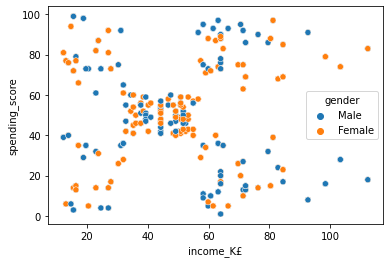

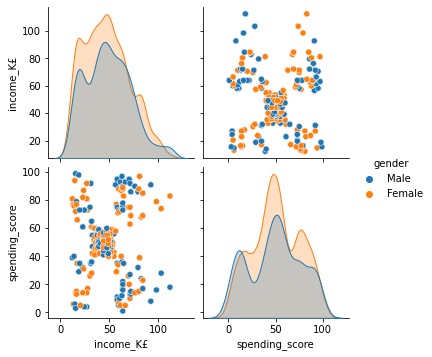

In [50]:
# Create a scatterplot with Seaborn.
sns.scatterplot(x='income_K£', y='spending_score',
                data=df2, hue='gender')


# Create a pairplot with Seaborn.
x = df2[['income_K£', 'spending_score']]

sns.pairplot(df2, vars=x, hue='gender', diag_kind= 'kde')

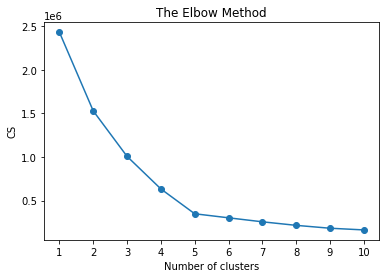

In [51]:
# Import the KMeans class.
from sklearn.cluster import KMeans 

# Elbow chart for us to decide on the number of optimal clusters.
cs = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    cs.append(kmeans.inertia_)

plt.plot(range(1, 11), cs, marker='o')
plt.xticks(range(1, 11))
plt.title("The Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("CS")

plt.show()

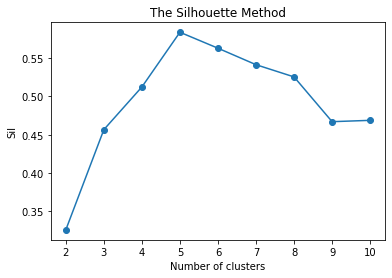

In [52]:
# Import silhouette_score class from sklearn.
from sklearn.metrics import silhouette_score

# Find the range of clusters to be used using silhouette method.
sil = []
kmax = 10

for k in range(2, kmax+1):
    kmeans_s = KMeans(n_clusters = k, random_state=0).fit(x)
    labels = kmeans_s.labels_
    sil.append(silhouette_score(x, labels, metric = 'euclidean'))

# Plot the silhouette method.
plt.plot(range(2, kmax+1), sil, marker='o')

plt.title("The Silhouette Method")
plt.xlabel("Number of clusters")
plt.ylabel("Sil")

plt.show()

The optimal number of clusters is 5.

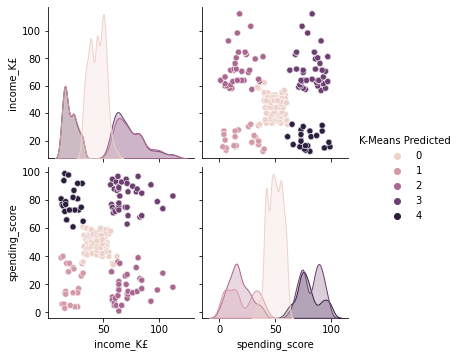

In [53]:
# Use 5 clusters:
kmeans = KMeans(n_clusters = 5, max_iter = 15000, init='k-means++', random_state=0).fit(x)
clusters = kmeans.labels_
x['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(x, hue='K-Means Predicted', diag_kind='kde')

In [54]:
# Check the number of observations per predicted class.
x['K-Means Predicted'].value_counts()

0    774
3    356
2    330
1    271
4    269
Name: K-Means Predicted, dtype: int64

In [55]:
# View the K-Means predicted.
print(x.head())

   income_K£  spending_score  K-Means Predicted
0      12.30              39                  1
1      12.30              81                  4
2      13.12               6                  1
3      13.12              77                  4
4      13.94              40                  1


Both 1 and 3 might give me the best clustering. 0 is larger than the rest.

<AxesSubplot:xlabel='income_K£', ylabel='spending_score'>

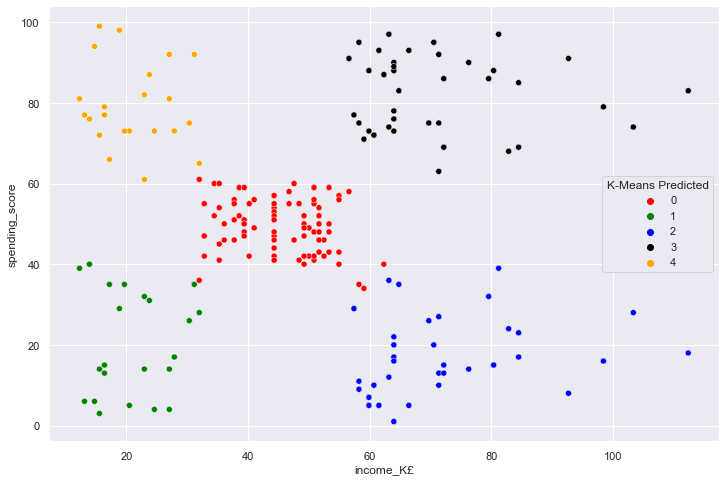

In [56]:
# Visualising the clusters.
# Set plot size.
sns.set(rc = {'figure.figsize':(12, 8)})

sns.scatterplot(x='income_K£' , 
                y='spending_score',
                data=x , hue='K-Means Predicted',
                palette=['red', 'green', 'blue', 'black', 'orange'])

## Week 3

Using NLP, I have to identify:

A) the 15 most common words used in online product reviews.
B) the top 20 positive reviews and the top 20 negative reviews received from the website.


## 1. Load and explore the data

In [57]:
# Import all the necessary packages.
import pandas as pd
import numpy as np
import nltk 
import os 
import matplotlib.pyplot as plt

nltk.download ('punkt')
nltk.download ('stopwords')

from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from textblob import TextBlob
from scipy.stats import norm

# Import Counter.
from collections import Counter

import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/eleonorabacchi/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/eleonorabacchi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [58]:
df3 = rev[['review', 'summary']]

df3.info

<bound method DataFrame.info of                                                  review  \
0     When it comes to a DM's screen, the space on t...   
1     An Open Letter to GaleForce9*:\n\nYour unpaint...   
2     Nice art, nice printing.  Why two panels are f...   
3     Amazing buy! Bought it as a gift for our new d...   
4     As my review of GF9's previous screens these w...   
...                                                 ...   
1995  The perfect word game for mixed ages (with Mom...   
1996  Great game.  Did not think I would like it whe...   
1997  Great game for all.........\nKeeps the mind ni...   
1998                                          fun game!   
1999  This game is fun. A lot like scrabble without ...   

                                                summary  
0     The fact that 50% of this space is wasted on a...  
1     Another worthless Dungeon Master's screen from...  
2                       pretty, but also pretty useless  
3                          

In [59]:
print(df3.shape)
print(df3.columns)
df3.head()

(2000, 2)
Index(['review', 'summary'], dtype='object')


review  \
0  When it comes to a DM's screen, the space on t...   
1  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2  Nice art, nice printing.  Why two panels are f...   
3  Amazing buy! Bought it as a gift for our new d...   
4  As my review of GF9's previous screens these w...   

                                             summary  
0  The fact that 50% of this space is wasted on a...  
1  Another worthless Dungeon Master's screen from...  
2                    pretty, but also pretty useless  
3                                         Five Stars  
4                                         Money trap

In [60]:
# Check for missing values
df3.isnull().sum()

review     0
summary    0
dtype: int64

# 2. Prepare the data for NLP

In [61]:
# Transform data to lowercase.
df3['review'] = df3['review'].apply(lambda x: " ".join(x.lower() for x in x.split()))

# Preview the result.
df3['review'].head()

0    when it comes to a dm's screen, the space on t...
1    an open letter to galeforce9*: your unpainted ...
2    nice art, nice printing. why two panels are fi...
3    amazing buy! bought it as a gift for our new d...
4    as my review of gf9's previous screens these w...
Name: review, dtype: object

In [62]:
# Transform data to lowercase.
df3['summary'] = df3['summary'].apply(lambda x: " ".join(x.lower() for x in x.split()))

# Preview the result.
df3['summary'].head()

0    the fact that 50% of this space is wasted on a...
1    another worthless dungeon master's screen from...
2                      pretty, but also pretty useless
3                                           five stars
4                                           money trap
Name: summary, dtype: object

In [63]:
# Remove punctuation in review.
df3['review'] = df3['review'].str.replace('[^\w\s]','')

# Preview the result.
df3['review'].head()

0    when it comes to a dms screen the space on the...
1    an open letter to galeforce9 your unpainted mi...
2    nice art nice printing why two panels are fill...
3    amazing buy bought it as a gift for our new dm...
4    as my review of gf9s previous screens these we...
Name: review, dtype: object

In [64]:
# Remove punctuation in summary.
df3['summary'] = df3['summary'].str.replace('[^\w\s]','')

# Preview the result.
df3['summary'].head()

0    the fact that 50 of this space is wasted on ar...
1    another worthless dungeon masters screen from ...
2                       pretty but also pretty useless
3                                           five stars
4                                           money trap
Name: summary, dtype: object

In [65]:
# Check the number of duplicate values in both columns.
df3.duplicated().sum()

39

In [67]:
# Drop duplicates in both columns.
df3 = df3.drop_duplicates()

# View DataFrame.
df3.shape

(1961, 2)

## 3. Tokenise and create wordclouds

In [71]:
# Create new DataFrame (copy DataFrame).
df4 = df3[['review', 'summary']]

# View DataFrame.
df4.reset_index(drop=True, inplace=True)
df4

review  \
0     when it comes to a dms screen the space on the...   
1     an open letter to galeforce9 your unpainted mi...   
2     nice art nice printing why two panels are fill...   
3     amazing buy bought it as a gift for our new dm...   
4     as my review of gf9s previous screens these we...   
...                                                 ...   
1956  the perfect word game for mixed ages with mom ...   
1957  great game did not think i would like it when ...   
1958           great game for all keeps the mind nimble   
1959                                           fun game   
1960  this game is fun a lot like scrabble without a...   

                                                summary  
0     the fact that 50 of this space is wasted on ar...  
1     another worthless dungeon masters screen from ...  
2                        pretty but also pretty useless  
3                                            five stars  
4                                            money trap  
...                                                 ...  
1956      the perfect word game for mixed ages with mom  
1957                                          super fun  
1958                                         great game  
1959                                         four stars  
1960                                     love this game  

[1961 rows x 2 columns]

In [72]:
# String all the comments together in a single variable.
# Create an empty string variable.
all_comments_review = ''
for i in range(df4.shape[0]):
    # Add each comment.
    all_comments = all_comments_review + df4['review'][i]

In [73]:
# String all the comments together in a single variable.
# Create an empty string variable.
all_comments_summary = ''
for i in range(df4.shape[0]):
    # Add each comment.
    all_comments = all_comments_summary + df4['summary'][i]

In [74]:
# You might need to install WordCloud.
!pip install WordCloud

In [75]:
# Import along with matplotlib and seaborn for visualisation.
from wordcloud import WordCloud 
import matplotlib.pyplot as plt 
import seaborn as sns

In [76]:
# You should have installed the nltk library previously.
# Otherwise:
!pip install nltk

In [77]:
# Import nltk and download nltk's resources to assist with tokenisation.
import nltk

nltk.download('punkt')
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/eleonorabacchi/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [78]:
# Tokenise the words.
df4['tokens_review'] = df4['review'].apply(word_tokenize)
df4['tokens_summary'] = df4['summary'].apply(word_tokenize)

# Preview data.
df4.head()

review  \
0  when it comes to a dms screen the space on the...   
1  an open letter to galeforce9 your unpainted mi...   
2  nice art nice printing why two panels are fill...   
3  amazing buy bought it as a gift for our new dm...   
4  as my review of gf9s previous screens these we...   

                                             summary  \
0  the fact that 50 of this space is wasted on ar...   
1  another worthless dungeon masters screen from ...   
2                     pretty but also pretty useless   
3                                         five stars   
4                                         money trap   

                                       tokens_review  \
0  [when, it, comes, to, a, dms, screen, the, spa...   
1  [an, open, letter, to, galeforce9, your, unpai...   
2  [nice, art, nice, printing, why, two, panels, ...   
3  [amazing, buy, bought, it, as, a, gift, for, o...   
4  [as, my, review, of, gf9s, previous, screens, ...   

                                      tokens_summary  
0  [the, fact, that, 50, of, this, space, is, was...  
1  [another, worthless, dungeon, masters, screen,...  
2               [pretty, but, also, pretty, useless]  
3                                      [five, stars]  
4                                      [money, trap]

In [79]:
# Define an empty list of tokens.
all_tokens_review = []

for i in range(df4.shape[0]):
    # Add each token to the list.
    all_tokens_review = all_tokens_review + df4['tokens_review'][i]

In [80]:
# Define an empty list of tokens.
all_tokens_summary = []

for i in range(df4.shape[0]):
    # Add each token to the list.
    all_tokens_summary = all_tokens_summary + df4['tokens_summary'][i]

In [81]:
# Import the FreqDist class.
from nltk.probability import FreqDist

# Calculate the frequency distribution.
fdist_review = FreqDist(all_tokens_review)

# Preview data.
fdist_review

FreqDist({'the': 5451, 'and': 3233, 'to': 3162, 'a': 3160, 'of': 2488, 'i': 2090, 'it': 2083, 'is': 1782, 'this': 1776, 'game': 1671, ...})

In [82]:
# Import the FreqDist class.
from nltk.probability import FreqDist

# Calculate the frequency distribution.
fdist_summary = FreqDist(all_tokens_summary)

# Preview data.
fdist_summary

FreqDist({'stars': 427, 'five': 342, 'game': 319, 'great': 295, 'the': 261, 'a': 240, 'for': 232, 'fun': 218, 'to': 192, 'and': 168, ...})

In [83]:
# Filter out tokens that are neither alphabets nor numbers (to eliminate punctuation marks, etc.).
tokens1_review = [word for word in all_tokens_review if word.isalnum()]

In [84]:
# Filter out tokens that are neither alphabets nor numbers (to eliminate punctuation marks, etc.).
tokens1_summary = [word for word in all_tokens_summary if word.isalnum()]

In [85]:
# Download the stop word list.
nltk.download ('stopwords')
from nltk.corpus import stopwords

# Create a set of English stop words.
english_stopwords = set(stopwords.words('english'))

# Create a filtered list of tokens without stop words.
tokens2_review = [x for x in tokens1_review if x.lower() not in english_stopwords]

# Define an empty string variable.
tokens2_review_string = ''

for value in tokens2_review:
    # Add each filtered token word to the string.
    tokens2_review_string = tokens2_review_string + value + ' '

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/eleonorabacchi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [86]:
# Download the stop word list.
nltk.download ('stopwords')
from nltk.corpus import stopwords

# Create a set of English stop words.
english_stopwords = set(stopwords.words('english'))

# Create a filtered list of tokens without stop words.
tokens2_summary = [x for x in tokens1_summary if x.lower() not in english_stopwords]

# Define an empty string variable.
tokens2_summary_string = ''

for value in tokens2_summary:
    # Add each filtered token word to the string.
    tokens2_summary_string = tokens2_summary_string + value + ' '

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/eleonorabacchi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


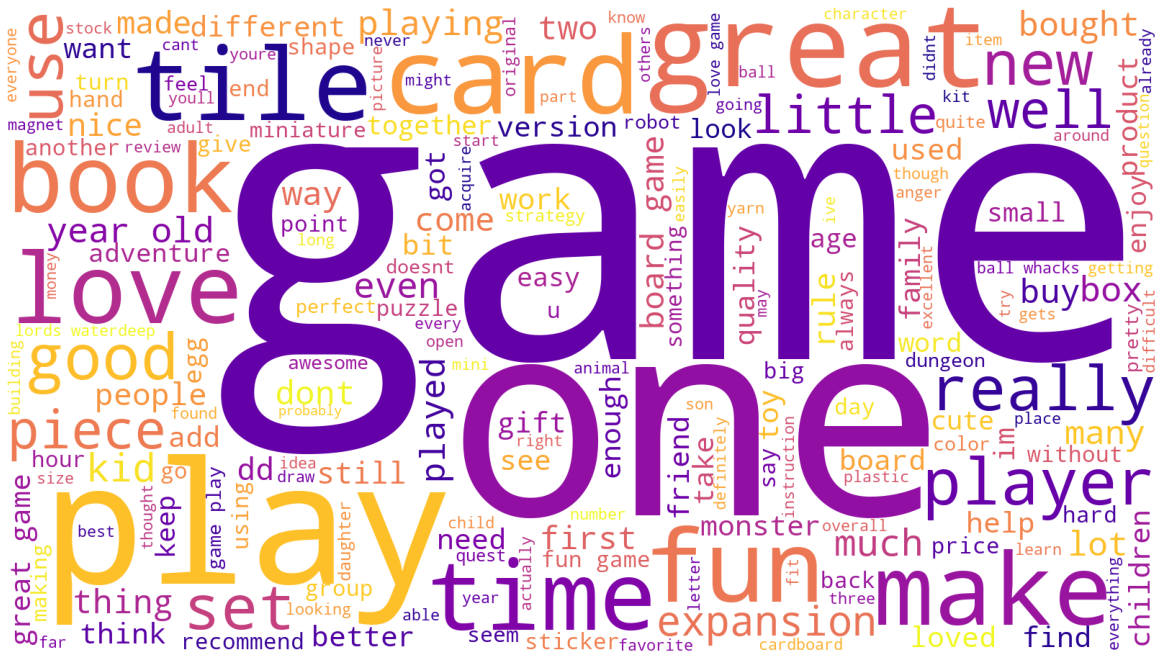

In [87]:
# Create a WordCloud.
wordcloud = WordCloud(width = 1600, height = 900, 
                background_color ='white', 
                colormap='plasma', 
                min_font_size = 10).generate(tokens2_review_string) 

# Plot the WordCloud image.                        
plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis('off') 
plt.tight_layout(pad = 0) 
plt.show()

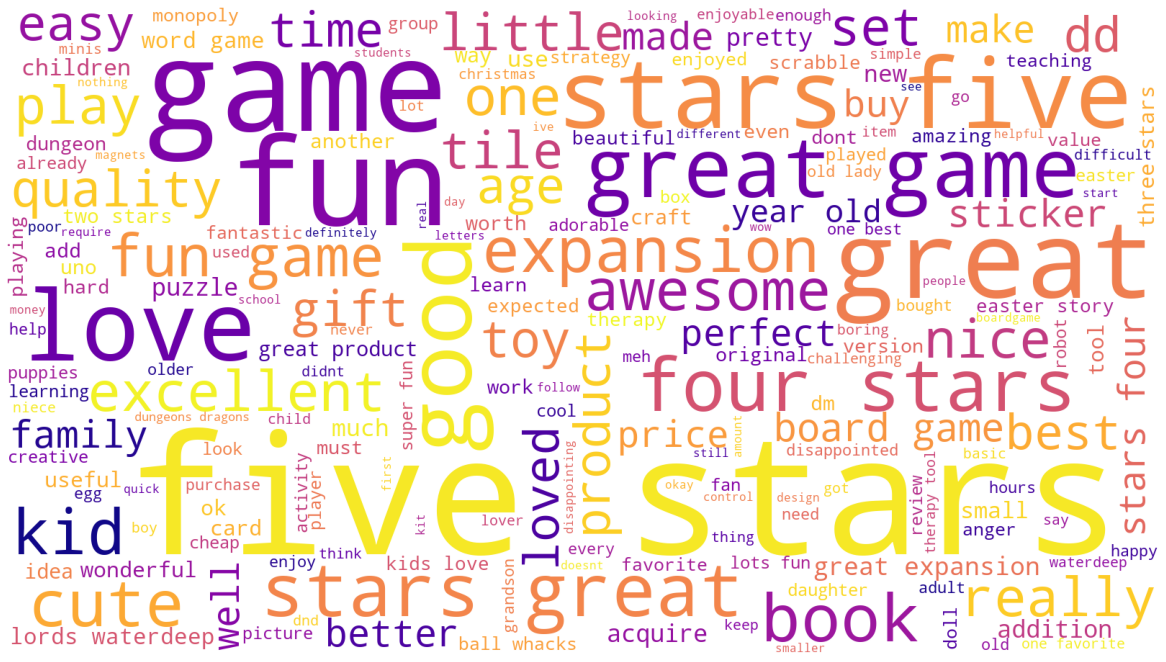

In [88]:
# Create a WordCloud.
wordcloud = WordCloud(width = 1600, height = 900, 
                background_color ='white', 
                colormap='plasma', 
                min_font_size = 10).generate(tokens2_summary_string) 

# Plot the WordCloud image.                        
plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis('off') 
plt.tight_layout(pad = 0) 
plt.show()

In [89]:
# View the frequency distribution.
fdist1_review = FreqDist(tokens2_review)

# Preview the data.
fdist1_review

FreqDist({'game': 1671, 'great': 580, 'fun': 552, 'one': 530, 'play': 502, 'like': 414, 'love': 323, 'really': 319, 'get': 319, 'cards': 301, ...})

In [90]:
# View the frequency distribution.
fdist1_summary = FreqDist(tokens2_summary)

# Preview the data.
fdist1_summary

FreqDist({'stars': 427, 'five': 342, 'game': 319, 'great': 295, 'fun': 218, 'love': 93, 'good': 92, 'four': 58, 'like': 54, 'expansion': 52, ...})

In [91]:
# Import the Counter class.
from collections import Counter

# Generate a DataFrame from Counter.
counts_review = pd.DataFrame(Counter(tokens2_review).most_common(15),
                      columns=['Word', 'Frequency']).set_index('Word')

# Preview data.
counts_review

Frequency
Word             
game         1671
great         580
fun           552
one           530
play          502
like          414
love          323
really        319
get           319
cards         301
tiles         297
time          291
good          289
would         280
book          273

In [92]:
# Generate a DataFrame from Counter.
counts_summary = pd.DataFrame(Counter(tokens2_summary).most_common(15),
                      columns=['Word', 'Frequency']).set_index('Word')

# Preview data.
counts_summary

Frequency
Word                
stars            427
five             342
game             319
great            295
fun              218
love              93
good              92
four              58
like              54
expansion         52
kids              50
cute              45
book              43
one               38
awesome           36

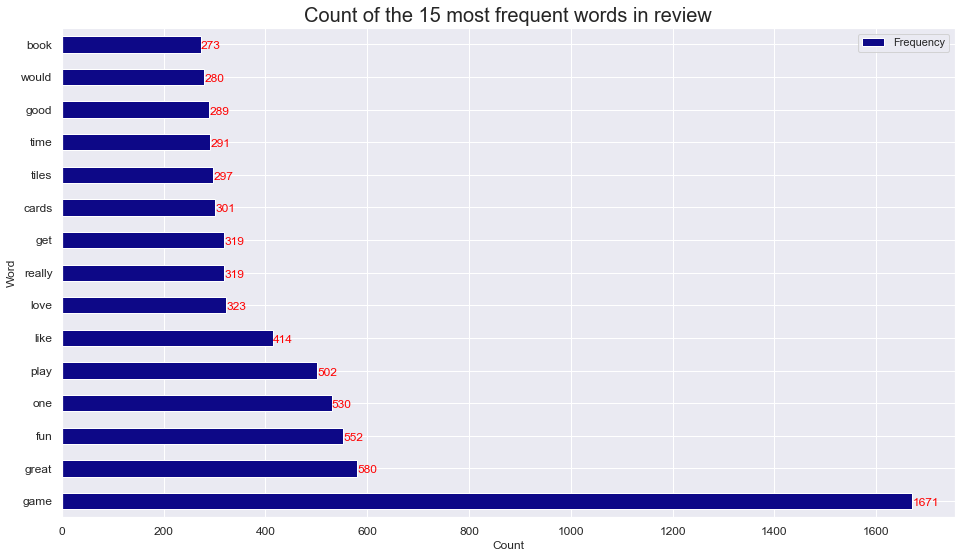

In [93]:
# Set the plot type.
ax = counts_review.plot(kind='barh', figsize=(16, 9), fontsize=12,
                 colormap ='plasma')

# Set the labels.
ax.set_xlabel('Count', fontsize=12)
ax.set_ylabel('Word', fontsize=12)
ax.set_title("Count of the 15 most frequent words in review",
             fontsize=20)

# Draw the bar labels.
for i in ax.patches:
    ax.text(i.get_width()+.41, i.get_y()+.1, str(round((i.get_width()), 2)),
            fontsize=12, color='red')

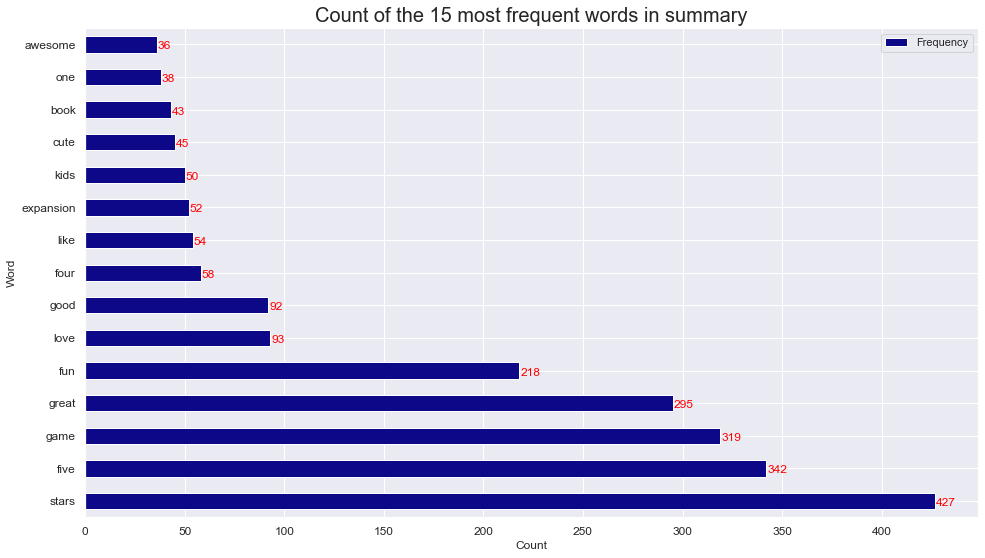

In [94]:
# Set the plot type.
ax = counts_summary.plot(kind='barh', figsize=(16, 9), fontsize=12,
                 colormap ='plasma')

# Set the labels.
ax.set_xlabel('Count', fontsize=12)
ax.set_ylabel('Word', fontsize=12)
ax.set_title("Count of the 15 most frequent words in summary",
             fontsize=20)

# Draw the bar labels.
for i in ax.patches:
    ax.text(i.get_width()+.41, i.get_y()+.1, str(round((i.get_width()), 2)),
            fontsize=12, color='red')

In [95]:
# Install TextBlob.
!pip install textblob

# Import the necessary package.
from textblob import TextBlob

In [96]:
def generate_polarity(comment):
    return TextBlob(comment).sentiment[0]
    
df4['polarity_review'] = df4['review'].apply(generate_polarity)

df4['polarity_review'].head()

0   -0.036111
1    0.035952
2    0.116640
3    0.578788
4   -0.316667
Name: polarity_review, dtype: float64

In [97]:
def generate_polarity(comment):
    return TextBlob(comment).sentiment[0]
    
df4['polarity_summary'] = df4['summary'].apply(generate_polarity)

df4['polarity_summary'].head()

0    0.15
1   -0.80
2    0.00
3    0.00
4    0.00
Name: polarity_summary, dtype: float64

In [98]:
def generate_subjectivity(comment):
    return TextBlob(comment).sentiment[1]
    
df4['subjectivity_review'] = df4['review'].apply(generate_subjectivity)

df4['subjectivity_review'].head()

0    0.486111
1    0.442976
2    0.430435
3    0.784848
4    0.316667
Name: subjectivity_review, dtype: float64

In [99]:
def generate_subjectivity(comment):
    return TextBlob(comment).sentiment[1]
    
df4['subjectivity_summary'] = df4['summary'].apply(generate_subjectivity)

df4['subjectivity_summary'].head()

0    0.500000
1    0.900000
2    0.733333
3    0.000000
4    0.000000
Name: subjectivity_summary, dtype: float64

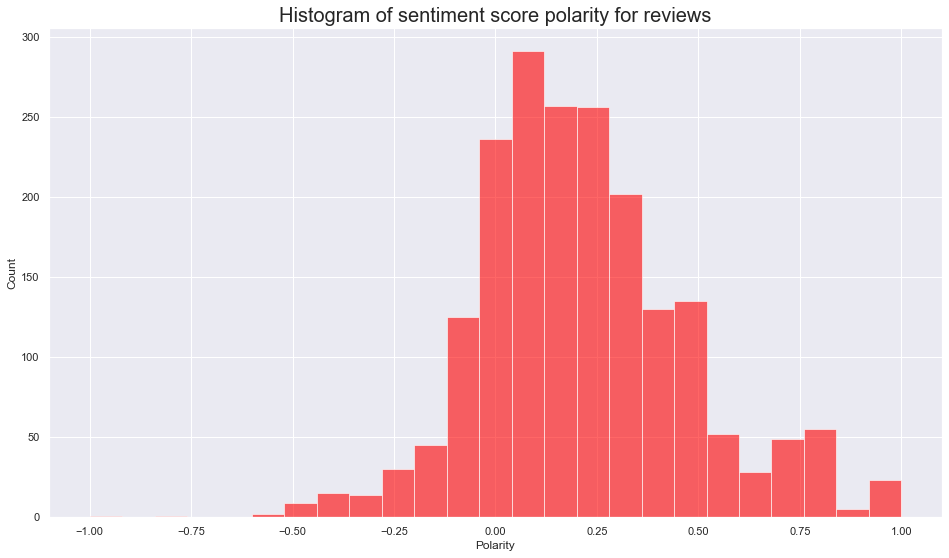

In [100]:
# Set the number of bins.
num_bins = 25

# Set the plot area.
plt.figure(figsize=(16,9))

# Define the bars.
n, bins, patches = plt.hist(df4['polarity_review'], num_bins, facecolor='red', alpha=0.6)

# Set the labels.
plt.xlabel('Polarity', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Histogram of sentiment score polarity for reviews', fontsize=20)

plt.show()

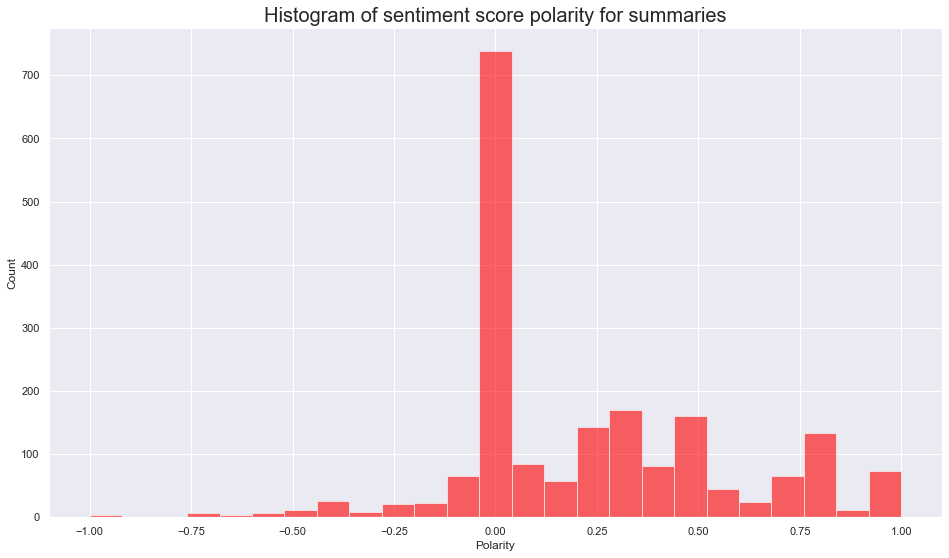

In [101]:
# Set the number of bins.
num_bins = 25

# Set the plot area.
plt.figure(figsize=(16,9))

# Define the bars.
n, bins, patches = plt.hist(df4['polarity_summary'], num_bins, facecolor='red', alpha=0.6)

# Set the labels.
plt.xlabel('Polarity', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Histogram of sentiment score polarity for summaries', fontsize=20)

plt.show()

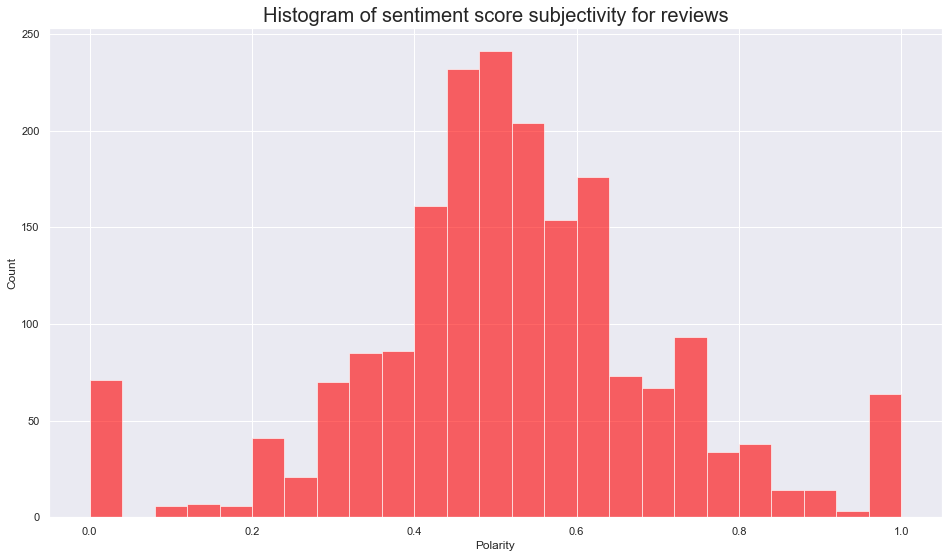

In [102]:
# Set the number of bins.
num_bins = 25

# Set the plot area.
plt.figure(figsize=(16,9))

# Define the bars.
n, bins, patches = plt.hist(df4['subjectivity_review'], num_bins, facecolor='red', alpha=0.6)

# Set the labels.
plt.xlabel('Polarity', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Histogram of sentiment score subjectivity for reviews', fontsize=20)

plt.show()

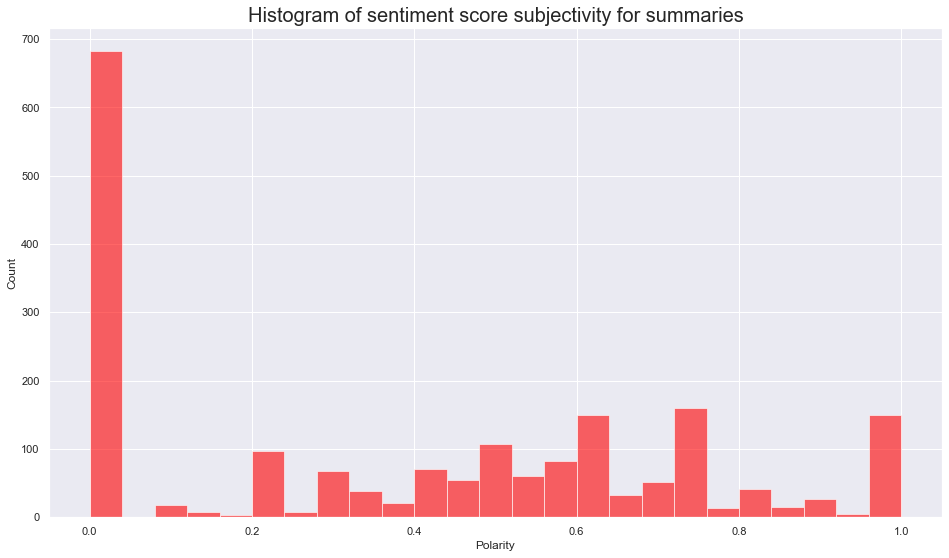

In [103]:
# Set the number of bins.
num_bins = 25

# Set the plot area.
plt.figure(figsize=(16,9))

# Define the bars.
n, bins, patches = plt.hist(df4['subjectivity_summary'], num_bins, facecolor='red', alpha=0.6)

# Set the labels.
plt.xlabel('Polarity', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Histogram of sentiment score subjectivity for summaries', fontsize=20)

plt.show()

In [104]:
# Create a DataFrame.
positive_sentiment = df4.nlargest(20, 'polarity_review')

# Adjust the column width.
positive_sentiment.style.set_properties(subset=['review'], **{'width': '1200px'})

In [105]:
# Create a DataFrame.
positive_sentiment = df4.nlargest(20, 'polarity_summary')

# Adjust the column width.
positive_sentiment.style.set_properties(subset=['summary'], **{'width': '1200px'})

In [106]:
# Create a DataFrame.
negative_sentiment = df4.nsmallest(10, 'polarity_review')

# Adjust the column width.
negative_sentiment.style.set_properties(subset=['review'], **{'width': '1200px'})

In [107]:
# Create a DataFrame.
negative_sentiment = df4.nsmallest(10, 'polarity_summary')

# Adjust the column width.
negative_sentiment.style.set_properties(subset=['summary'], **{'width': '1200px'})

## 3a) Identify name entities

I also want to check name entities

In [108]:
!pip install -U pip setuptools wheel
!pip install -U spacy
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 16.2 MB/s eta 0:00:0000:0100:01


✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [109]:
!python -m venv .env
!source .env/bin/activate
!pip install -U pip setuptools wheel
!pip install -U spacy

In [110]:
# Import library.
import spacy

# Load the English resource.
nlp_review = spacy.load('en_core_web_sm')

# Return the text snippet and its corresponding entity label in a list.
def generate_named_entities(review):
    return [(ent.text.strip(), ent.label_) for ent in nlp_review(review).ents]

In [111]:
# Import library.
import spacy

# Load the English resource.
nlp_summary = spacy.load('en_core_web_sm')

# Return the text snippet and its corresponding entity label in a list.
def generate_named_entities(summary):
    return [(ent.text.strip(), ent.label_) for ent in nlp_summary(summary).ents]

In [112]:
df4['named_entities_review'] = df4['review'].apply(generate_named_entities)
df4['named_entities_summary'] = df4['summary'].apply(generate_named_entities)

df4.head()

review  \
0  when it comes to a dms screen the space on the...   
1  an open letter to galeforce9 your unpainted mi...   
2  nice art nice printing why two panels are fill...   
3  amazing buy bought it as a gift for our new dm...   
4  as my review of gf9s previous screens these we...   

                                             summary  \
0  the fact that 50 of this space is wasted on ar...   
1  another worthless dungeon masters screen from ...   
2                     pretty but also pretty useless   
3                                         five stars   
4                                         money trap   

                                       tokens_review  \
0  [when, it, comes, to, a, dms, screen, the, spa...   
1  [an, open, letter, to, galeforce9, your, unpai...   
2  [nice, art, nice, printing, why, two, panels, ...   
3  [amazing, buy, bought, it, as, a, gift, for, o...   
4  [as, my, review, of, gf9s, previous, screens, ...   

                                      tokens_summary  polarity_review  \
0  [the, fact, that, 50, of, this, space, is, was...        -0.036111   
1  [another, worthless, dungeon, masters, screen,...         0.035952   
2               [pretty, but, also, pretty, useless]         0.116640   
3                                      [five, stars]         0.578788   
4                                      [money, trap]        -0.316667   

   polarity_summary  subjectivity_review  subjectivity_summary  \
0              0.15             0.486111              0.500000   
1             -0.80             0.442976              0.900000   
2              0.00             0.430435              0.733333   
3              0.00             0.784848              0.000000   
4              0.00             0.316667              0.000000   

                               named_entities_review named_entities_summary  
0                                   [(50, CARDINAL)]       [(50, CARDINAL)]  
1                                                 []                     []  
2  [(two, CARDINAL), (one, CARDINAL), (npcs, ORG)...                     []  
3                                                 []     [(five, CARDINAL)]  
4                                   [(gf9s, PERSON)]                     []

Visualise named entities

In [113]:
from spacy import displacy

# Iterate through a selection of comments.
for i in range(750,1750):
    # Check whether the corresponding comment has a named entity.
    if df4['named_entities_review'][i]:
        # Highlight the entity in the comment.
        displacy.render(nlp_review(df4['review'][i]), style='ent', jupyter=True)

In [114]:
# Iterate through a selection of comments.
for i in range(750,1750):
    # Check whether the corresponding comment has a named entity.
    if df4['named_entities_summary'][i]:
        # Highlight the entity in the comment.
        displacy.render(nlp_summary(df4['summary'][i]), style='ent', jupyter=True)

## 3b) Generate a document-term matrix 

Review column

In [115]:
# Import the necessary classes.
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer

# Use a tokenizer object to remove unwanted elements.
token = RegexpTokenizer(r'[a-zA-Z0-9]+')

# Create a CountVectorizer object to process the comments.
cv = CountVectorizer(lowercase=True,stop_words='english',ngram_range = (1,1),
                     tokenizer = token.tokenize)

# Apply the transformation to the comment data.
cvs= cv.fit_transform(df4['review'])

In [116]:
# Create a DataFrame.
dt = pd.DataFrame(cvs.todense()).iloc[:15]  

# Name the columns.
dt.columns = cv.get_feature_names()

# Transpose columns and headings.
document_term_matrix = dt.T

# Update the column names.
document_term_matrix.columns = ['Doc '+str(i) for i in range(1, 16)]

# Get the totals.
document_term_matrix['total_count_review'] = document_term_matrix.sum(axis=1)

# Identify the top 10 words 
document_term_matrix = document_term_matrix.sort_values(by ='total_count_review', 
                                                        ascending=False)[:10] 

# Display the results.
print(document_term_matrix.drop(columns=['total_count_review']).head(10))

            Doc 1  Doc 2  Doc 3  Doc 4  Doc 5  Doc 6  Doc 7  Doc 8  Doc 9  \
screen          2      2      2      0      0      0      1      0      1   
adventure       0      2      4      0      0      0      0      0      0   
map             0      1      3      0      0      0      0      0      1   
useful          0      2      5      0      0      0      0      0      0   
use             0      1      4      0      0      0      0      0      0   
screens         0      2      2      0      1      0      1      0      0   
dm              0      2      1      1      0      0      0      0      0   
space           2      0      1      0      0      0      0      0      0   
completely      2      0      0      0      1      0      0      0      0   
dms             1      0      1      0      0      0      0      0      1   

            Doc 10  Doc 11  Doc 12  Doc 13  Doc 14  Doc 15  
screen           5       0       0       2       0       0  
adventure        5       0    

<AxesSubplot:>

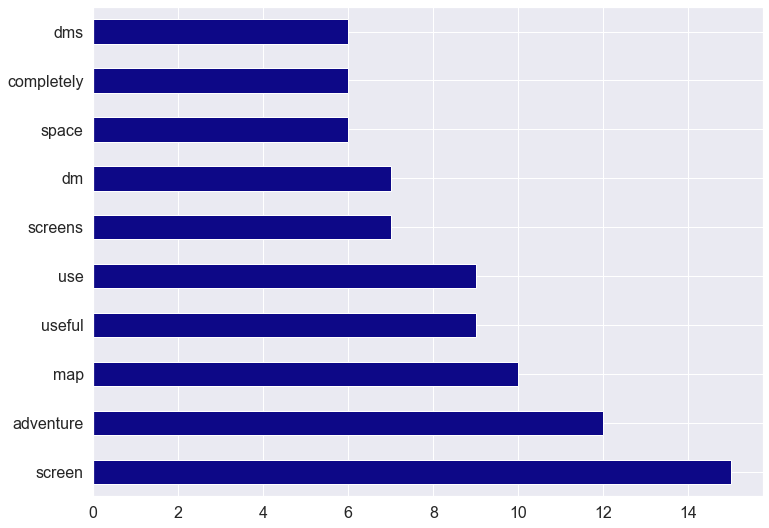

In [117]:
document_term_matrix['total_count_review'].plot.barh(figsize=(12, 9), fontsize=16, colormap ='plasma')

Summary column

In [118]:
# Use a tokenizer object to remove unwanted elements.
token_a = RegexpTokenizer(r'[a-zA-Z0-9]+')

# Create a CountVectorizer object to process the comments.
cv_a = CountVectorizer(lowercase=True,stop_words='english',ngram_range = (1,1),
                     tokenizer = token_a.tokenize)

# Apply the transformation to the comment data.
cvs_a = cv_a.fit_transform(df4['summary'])

In [119]:
# Create a DataFrame.
dt_a = pd.DataFrame(cvs_a.todense()).iloc[:15]  

# Name the columns.
dt_a.columns = cv_a.get_feature_names()

# Transpose columns and headings.
document_term_matrix = dt_a.T

# Update the column names.
document_term_matrix.columns = ['Doc '+str(i) for i in range(1, 16)]

# Get the totals.
document_term_matrix['total_count_summary'] = document_term_matrix.sum(axis=1)

# Identify the top 10 words 
document_term_matrix = document_term_matrix.sort_values(by ='total_count_summary', 
                                                        ascending=False)[:10] 

# Display the results.
print(document_term_matrix.drop(columns=['total_count_summary']).head(10))

             Doc 1  Doc 2  Doc 3  Doc 4  Doc 5  Doc 6  Doc 7  Doc 8  Doc 9  \
stars            0      0      0      1      0      1      0      1      0   
screen           0      1      0      0      0      0      1      0      0   
art              2      0      0      0      0      0      0      0      0   
pretty           0      0      2      0      0      0      0      0      0   
product          0      0      0      0      0      0      0      0      0   
money            0      0      0      0      1      0      0      0      0   
informative      1      0      0      0      0      0      0      0      0   
map              0      0      0      0      0      0      0      0      0   
weak             0      0      0      0      0      0      0      0      0   
masters          0      1      0      0      0      0      0      0      0   

             Doc 10  Doc 11  Doc 12  Doc 13  Doc 14  Doc 15  
stars             0       1       0       0       0       0  
screen           

<AxesSubplot:>

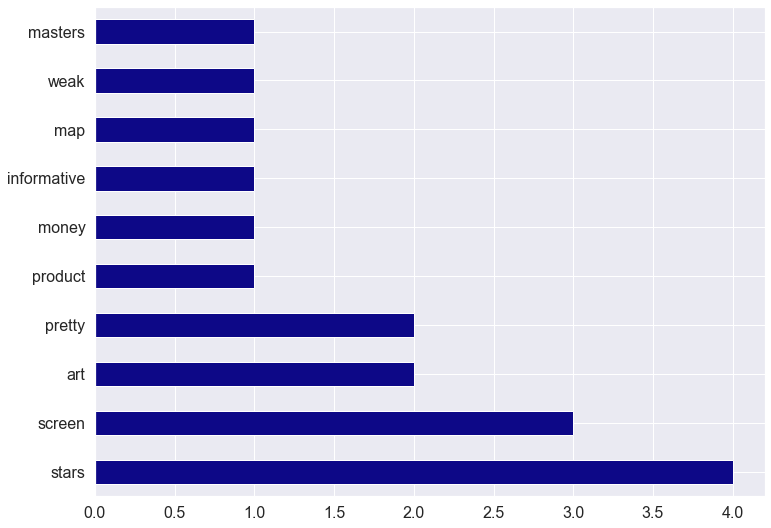

In [120]:
document_term_matrix['total_count_summary'].plot.barh(figsize=(12, 9), fontsize=16, colormap ='plasma')

## 3c) The Lesk Algorithm

In [121]:
from nltk.wsd import lesk
from nltk.tokenize import word_tokenize
from nltk.corpus import wordnet

In [122]:
a1= lesk(word_tokenize('this was a gift for my daughter i found it difficult to use'),'difficult')
print(a1,a1.definition())
a2 = lesk(word_tokenize('it is the best thing to play with and also mind blowing in some ways'),'blowing')
print(a2,a2.definition())

Synset('unmanageable.a.02') hard to control; ,
Synset('float.v.01') be in motion due to some air or water current
